In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openpyxl
import datetime
import seaborn as sns
import statsmodels.api as sm

from plotnine import (
  ggplot, 
  theme_bw,
   labs,
   aes, 
   geom_histogram, 
   geom_point,
   stat_function, 
   scale_color_manual
  )
from dplython import (
  DplyFrame, 
  mutate,
  DelayFunction
  ) 

from scipy.stats import norm

from scipy.special import boxcox, inv_boxcox
from sklearn.preprocessing import PowerTransformer
from pmdarima.model_selection import train_test_split



from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import MultiTaskLasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import MultiTaskElasticNet
from sklearn.linear_model import Lars
from sklearn.linear_model import LassoLars
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import TheilSenRegressor

from sklearn.metrics import r2_score

import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.tools.eval_measures import rmse
from statsmodels.graphics.tsaplots import plot_acf

from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.stattools import jarque_bera
from statsmodels.compat import lzip

from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [6]:
db = pd.read_csv('database_mensal.csv')

In [7]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       70 non-null     object 
 1   price      70 non-null     float64
 2   petroleum  70 non-null     float64
 3   dolar      70 non-null     float64
 4   covid      70 non-null     int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 2.9+ KB


In [8]:
db.isna().sum()

date         0
price        0
petroleum    0
dolar        0
covid        0
dtype: int64

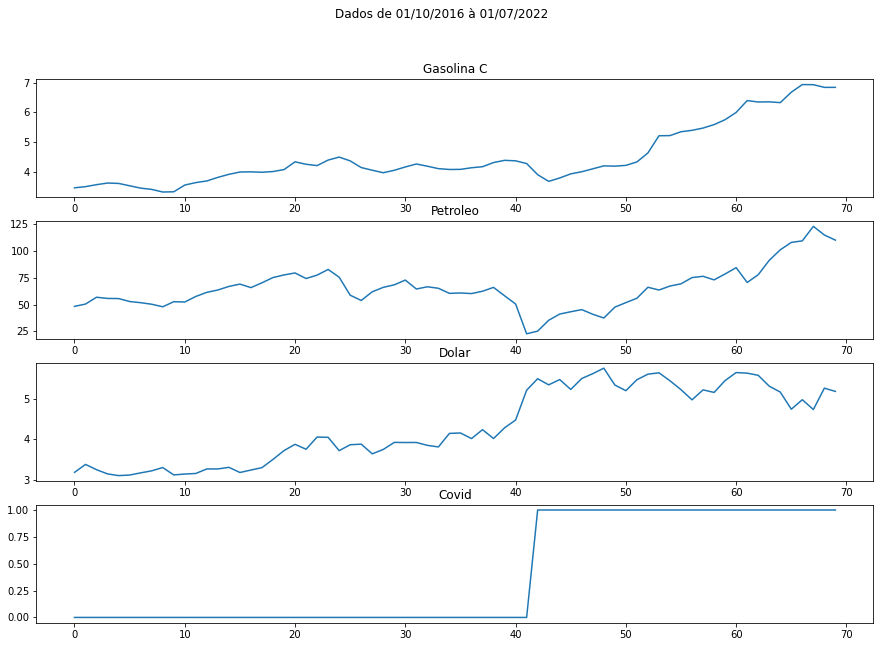

In [9]:
fig, axs = plt.subplots(4, figsize=(15,10))
fig.suptitle("Dados de 01/10/2016 à 01/07/2022")
x = db['date']
axs[0].set_title("Gasolina C")
axs[0].plot(db['price'])
axs[1].set_title("Petroleo")
axs[1].plot(db['petroleum'])
axs[2].set_title("Dolar")
axs[2].plot(db['dolar'])
axs[3].set_title("Covid")
axs[3].plot(db['covid'])

<AxesSubplot:>

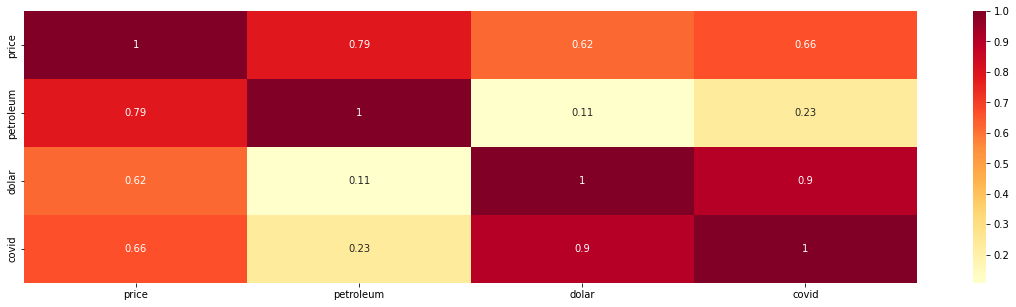

In [10]:
plt.figure(figsize=(20,5))
corr=db.corr()
sns.heatmap(corr, annot = True, cmap = "YlOrRd")

c:\Users\Gabriel\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
c:\Users\Gabriel\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
c:\Users\Gabriel\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

<AxesSubplot:xlabel='dolar', ylabel='Density'>

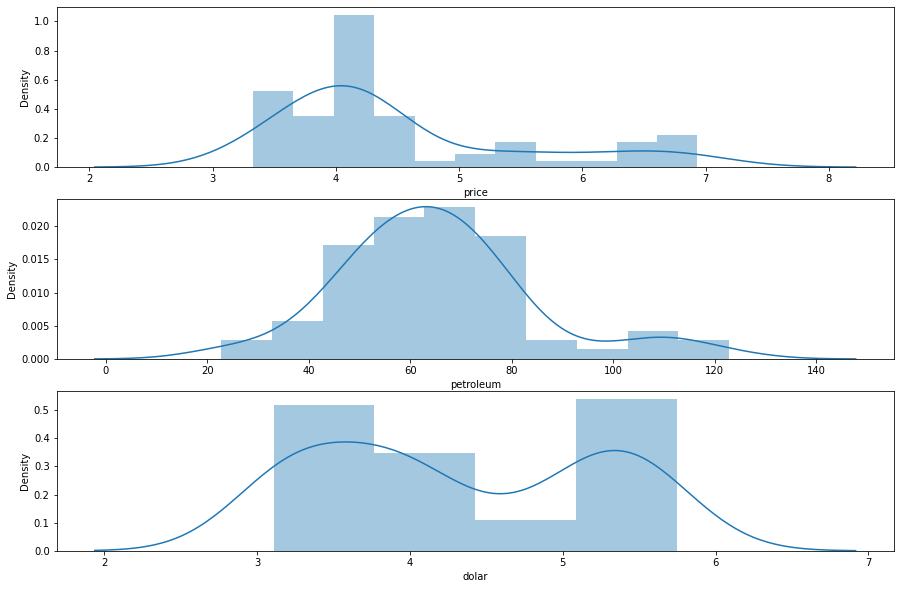

In [11]:
fig, axarr = plt.subplots(3, 1, figsize=(15,10))
sns.distplot(db['price'], ax=axarr[0] )
sns.distplot(db['petroleum'], ax=axarr[1])
sns.distplot(db['dolar'], ax=axarr[2])

<Figure size 1440x360 with 0 Axes>

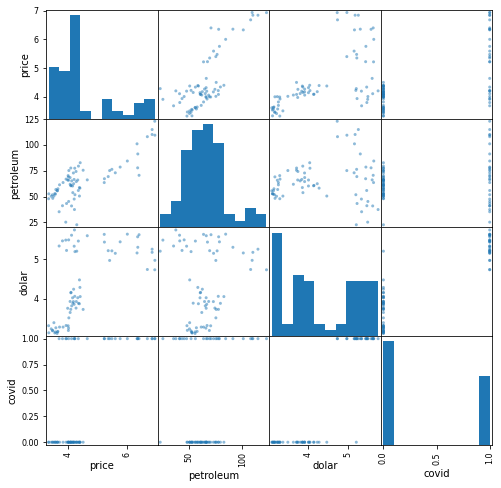

In [12]:
plt.figure(figsize=(20,5))
pd.plotting.scatter_matrix(db, figsize=(8,8))
plt.show()

In [82]:
# from pmdarima.model_selection import train_test_split

# Tamanho da amostra de testes ( 80 e 20)
test_size = round(db.shape[0] * 0.2)
train_set, test_set = train_test_split(db, test_size=test_size)

In [83]:
# X = sm.add_constant(treino)
model=smf.ols(formula='price ~ dolar + petroleum + covid', data=train_set).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     58.80
Date:                Sun, 31 Jul 2022   Prob (F-statistic):           1.01e-16
Time:                        20:20:42   Log-Likelihood:                 9.9338
No. Observations:                  56   AIC:                            -11.87
Df Residuals:                      52   BIC:                            -3.766
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5215      0.303      1.723      0.091      -0.086       1.129
dolar          0.5688      0.069      8.213      0.000       0.430       0.708
petroleum      0.0221      0.002      9.005      0.000       0.017       0.027
covid         -0.3623      0.142     -2.557      0.014      -0.647      -0.078
==============================================================================
Omnibus:                       12.257   Durbin-Watson:                   0.673
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.277
Skew:                           0.936   Prob(JB):                      0.00131
Kurtosis:                       4.478   Cond. No.                         690.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
# X = sm.add_constant(treino)
model_dolar=smf.ols(formula='price ~ dolar', data=train_set).fit()
model_dolar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     27.88
Date:                Sun, 31 Jul 2022   Prob (F-statistic):           2.36e-06
Time:                        20:20:44   Log-Likelihood:                -19.846
No. Observations:                  56   AIC:                             43.69
Df Residuals:                      54   BIC:                             47.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8935      0.226     12.821      0.000       2.441       3.346
dolar          0.2838      0.054      5.280      0.000       0.176       0.392
==============================================================================
Omnibus:                        1.672   Durbin-Watson:                   0.197
Prob(Omnibus):                  0.433   Jarque-Bera (JB):                1.031
Skew:                           0.311   Prob(JB):                        0.597
Kurtosis:                       3.237   Cond. No.                         21.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
# X = sm.add_constant(treino)
model_petroleum=smf.ols(formula='price ~ petroleum', data=train_set).fit()
model_petroleum.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     7.744
Date:                Sun, 31 Jul 2022   Prob (F-statistic):            0.00741
Time:                        20:20:47   Log-Likelihood:                -27.749
No. Observations:                  56   AIC:                             59.50
Df Residuals:                      54   BIC:                             63.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3640      0.256     13.162      0.000       2.852       3.876
petroleum      0.0119      0.004      2.783      0.007       0.003       0.020
==============================================================================
Omnibus:                       10.549   Durbin-Watson:                   0.140
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.387
Skew:                           0.903   Prob(JB):                      0.00555
Kurtosis:                       4.090   Cond. No.                         284.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
# X = sm.add_constant(treino)
model_covid=smf.ols(formula='price ~ covid', data=train_set).fit()
model_covid.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     9.552
Date:                Sun, 31 Jul 2022   Prob (F-statistic):            0.00316
Time:                        20:20:49   Log-Likelihood:                -26.941
No. Observations:                  56   AIC:                             57.88
Df Residuals:                      54   BIC:                             61.93
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.9641      0.062     64.443      0.000       3.841       4.087
covid          0.3802      0.123      3.091      0.003       0.134       0.627
==============================================================================
Omnibus:                        1.115   Durbin-Watson:                   0.179
Prob(Omnibus):                  0.573   Jarque-Bera (JB):                1.127
Skew:                           0.313   Prob(JB):                        0.569
Kurtosis:                       2.698   Cond. No.                         2.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
def step(X, y,significancia=0.05):
    lista_inicial = []
    incluidos = list(lista_inicial)
    while True:
        modificado=False
        excluidos = list(set(X.columns) - set(incluidos))
        novo_pvalue = pd.Series(index = excluidos, dtype='float32')
        for nova_coluna in excluidos:
            modelo = sm.OLS(y, sm.add_constant(pd.DataFrame(X[incluidos + [nova_coluna]]))).fit()
            novo_pvalue[nova_coluna] = modelo.pvalues[nova_coluna]
        melhor_pvalue = novo_pvalue.min()
        if melhor_pvalue < significancia:
            melhor_caracteristica = novo_pvalue.idxmin()
            incluidos.append(melhor_caracteristica)
            modificado=True            

        if not modificado:
            break

    return incluidos


In [88]:
x =  train_set[['petroleum', 'covid', 'dolar']]
y = train_set['price']

step(x, y)

['dolar', 'petroleum', 'covid']

In [89]:
# X = sm.add_constant(treino)
model_step=smf.ols(formula='price ~ petroleum + dolar + covid', data=train_set).fit()
model_step.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     58.80
Date:                Sun, 31 Jul 2022   Prob (F-statistic):           1.01e-16
Time:                        20:20:51   Log-Likelihood:                 9.9338
No. Observations:                  56   AIC:                            -11.87
Df Residuals:                      52   BIC:                            -3.766
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5215      0.303      1.723      0.091      -0.086       1.129
petroleum      0.0221      0.002      9.005      0.000       0.017       0.027
dolar          0.5688      0.069      8.213      0.000       0.430       0.708
covid         -0.3623      0.142     -2.557      0.014      -0.647      -0.078
==============================================================================
Omnibus:                       12.257   Durbin-Watson:                   0.673
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.277
Skew:                           0.936   Prob(JB):                      0.00131
Kurtosis:                       4.478   Cond. No.                         690.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
from scipy import stats

stats.shapiro(model_step.resid)

ShapiroResult(statistic=0.9468973875045776, pvalue=0.01548321358859539)

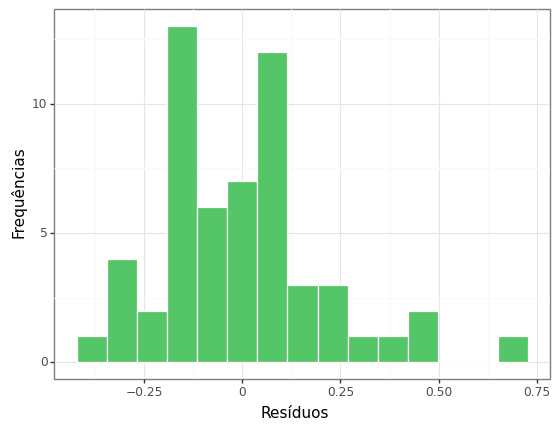

<ggplot: (144627379945)>

In [91]:
(ggplot(train_set >>
  mutate(residuos = model_step.resid),
        aes(x='residuos')) +
    geom_histogram(color = "white", 
                   fill = "#55C667FF", 
                   bins = 15,
                   alpha = 0.6) +
    labs(x = "Resíduos",
         y = "Frequências") + 
    theme_bw())



c:\Users\Gabriel\AppData\Local\Programs\Python\Python310\lib\site-packages\plotnine\guides\guides.py:187: PlotnineWarning: Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it


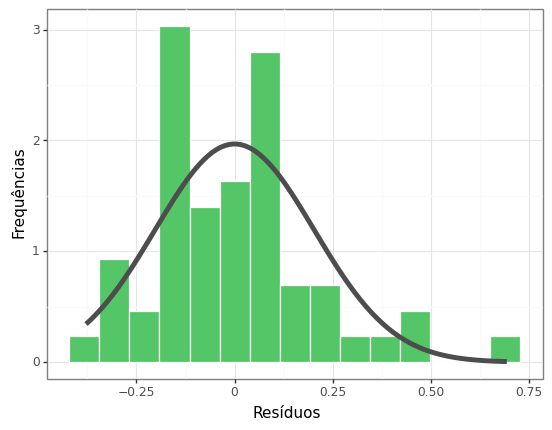

<ggplot: (144627595216)>

In [92]:
(ggplot(train_set >>
  mutate(residuos = model_step.resid),
        aes(x='residuos')) +
    geom_histogram(aes(y ='..density..'),
                   color = "white", 
                   fill = "#55C667FF", 
                   bins = 15,
                   alpha = 0.6) +
     stat_function(fun=norm.pdf,
                   args={'loc':np.mean(model_step.resid),
                         'scale':np.std(model_step.resid)},
                size = 2, color = "#4d4d4d") +
     scale_color_manual(values = "#7f7f7f") +
    labs(x = "Resíduos",
         y = "Frequências") + 
    theme_bw())



In [93]:
test = sms.het_breuschpagan(model_step.resid, model_step.model.exog)

names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
lzip(names, test)

[('Lagrange multiplier statistic', 15.6371586411787),
 ('p-value', 0.0013457070306462614),
 ('f-value', 6.71518837596718),
 ('f p-value', 0.0006474608968182143)]

Veja que no teste, o p-value ficou abaixo de 0.05, portanto há heterocedasticidade 

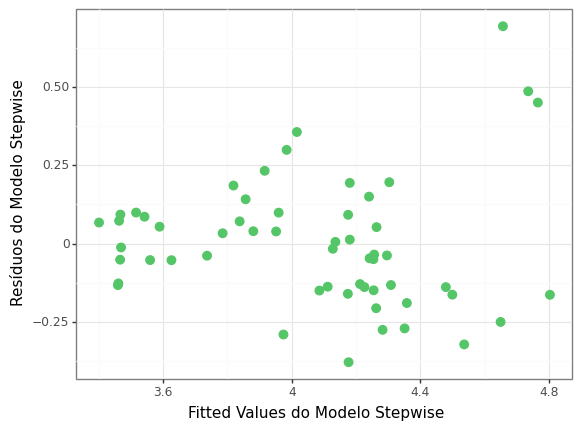

<ggplot: (144627628258)>

In [94]:
(ggplot(train_set >>
  mutate(fittedvalues = model_step.fittedvalues,residuos=model_step.resid),
        aes(x='fittedvalues',y='residuos')) +
 geom_point(color = "#55C667FF", size = 3) +
  labs(x = "Fitted Values do Modelo Stepwise",
       y = "Resíduos do Modelo Stepwise") +
  theme_bw())

In [95]:
pt = PowerTransformer(method='box-cox', standardize=False)
pt.fit(train_set['price'].values.reshape(-1, 1))

PowerTransformer(method='box-cox', standardize=False)

In [96]:
lambda_bc=pt.lambdas_
lambda_bc

array([-1.12430823])

In [97]:
train_set['pricebc'] = boxcox(train_set['price'],lambda_bc)

In [98]:
train_set.head(3)

,date,price,petroleum,dolar,covid,pricebc
0,2016-10-01,3.468,48.30,3.1893,0,0.669701
1,2016-11-01,3.507,50.47,3.3842,0,0.672446
2,2016-12-01,3.573,56.82,3.2547,0,0.676948


In [99]:
# X = sm.add_constant(treino)
model_step_boxcox=smf.ols(formula='pricebc ~ petroleum + dolar + covid', data=train_set).fit()
model_step_boxcox.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                pricebc   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     81.30
Date:                Sun, 31 Jul 2022   Prob (F-statistic):           1.24e-19
Time:                        20:21:01   Log-Likelihood:                 185.49
No. Observations:                  56   AIC:                            -363.0
Df Residuals:                      52   BIC:                            -354.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5155      0.013     39.138      0.000       0.489       0.542
petroleum      0.0011      0.000     10.261      0.000       0.001       0.001
dolar          0.0316      0.003     10.501      0.000       0.026       0.038
covid         -0.0256      0.006     -4.154      0.000      -0.038      -0.013
==============================================================================
Omnibus:                        0.919   Durbin-Watson:                   0.829
Prob(Omnibus):                  0.632   Jarque-Bera (JB):                0.952
Skew:                           0.283   Prob(JB):                        0.621
Kurtosis:                       2.705   Cond. No.                         690.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
stats.shapiro(model_step_boxcox.resid)

ShapiroResult(statistic=0.9845372438430786, pvalue=0.6883789300918579)

c:\Users\Gabriel\AppData\Local\Programs\Python\Python310\lib\site-packages\plotnine\guides\guides.py:187: PlotnineWarning: Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it


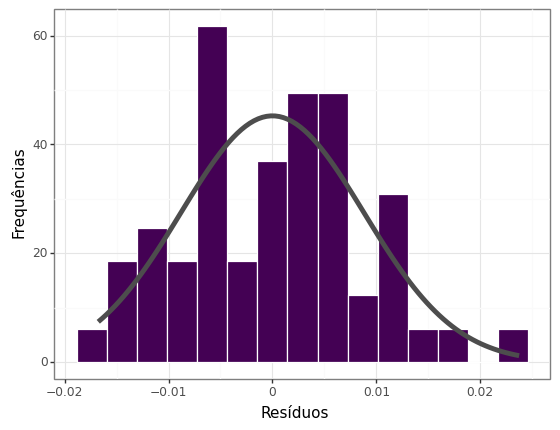

<ggplot: (144627780593)>

In [101]:
(ggplot(train_set >>
  mutate(residuos = model_step_boxcox.resid),
        aes(x='residuos')) +
    geom_histogram(aes(y ='..density..'),
                   color = "white", 
                   fill = "#440154FF", 
                   bins = 15,
                   alpha = 0.6) +
     stat_function(fun=norm.pdf,
                   args={'loc':np.mean(model_step_boxcox.resid),
                         'scale':np.std(model_step_boxcox.resid)},
                size = 2, color = "#4d4d4d") +
     scale_color_manual(values = "#7f7f7f") +
    labs(x = "Resíduos",
         y = "Frequências") + 
    theme_bw())

In [102]:
test = sms.het_breuschpagan(model_step_boxcox.resid, model_step_boxcox.model.exog)

names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
lzip(names, test)

[('Lagrange multiplier statistic', 7.065396901216735),
 ('p-value', 0.06984230495520763),
 ('f-value', 2.5026642062237374),
 ('f p-value', 0.06941516039595222)]

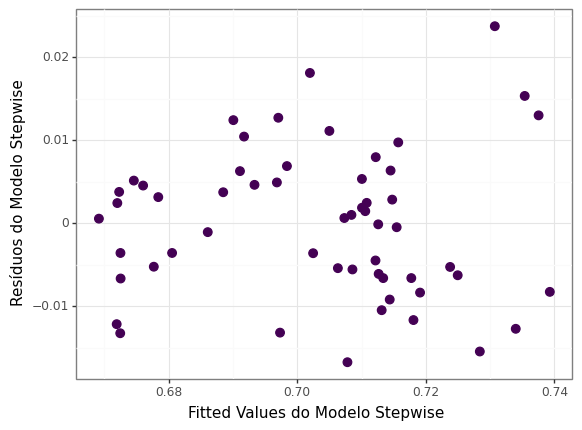

<ggplot: (144627810902)>

In [103]:
(ggplot(train_set >>
  mutate(fittedvalues = model_step_boxcox.fittedvalues,residuos=model_step_boxcox.resid),
        aes(x='fittedvalues',y='residuos')) +
 geom_point(color = "#440154FF", size = 3) +
  labs(x = "Fitted Values do Modelo Stepwise",
       y = "Resíduos do Modelo Stepwise") +
  theme_bw())

In [104]:
test_set['predict'] = inv_boxcox(model_step_boxcox.predict(test_set), lambda_bc)


[]

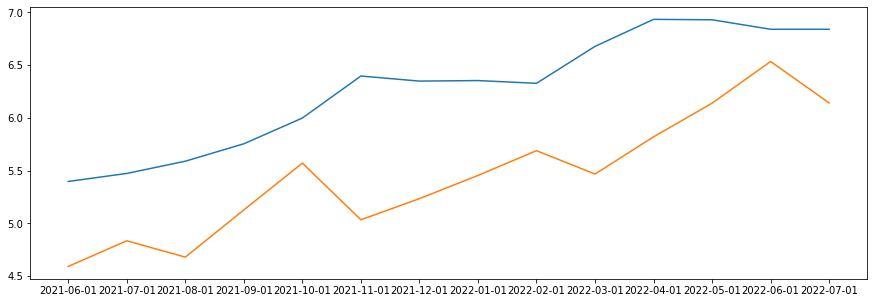

In [105]:
plt.figure(figsize=(15,5))
plt.plot(test_set['date'], test_set['price'])
plt.plot(test_set['date'], test_set['predict'])
plt.plot(figsize=(15,10))

In [109]:
from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(test_set['price'], test_set['predict'])
mape

0.10425511541398928

In [107]:

sgd=SGDRegressor(loss='squared_loss', eta0=0.00001, power_t=0.15).fit(x, y)

c:\Users\Gabriel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.


[]

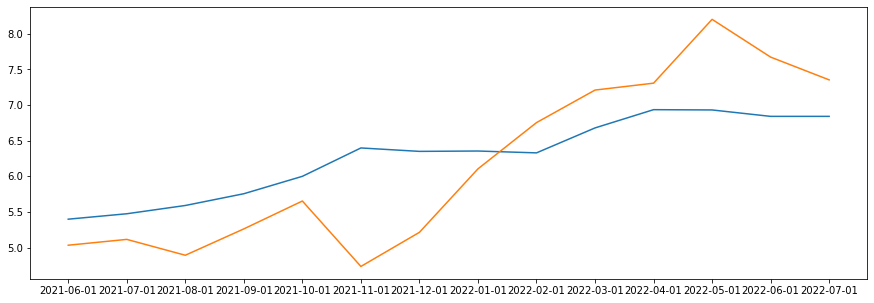

In [108]:
test_set['predict'] = sgd.predict(test_set[['petroleum', 'covid', 'dolar']])
plt.figure(figsize=(15,5))
plt.plot(test_set['date'], test_set['price'])
plt.plot(test_set['date'], test_set['predict'])
plt.plot(figsize=(15,10))